# NLP

---

#### Tokenization & Vectorization

문장을 의미 있는 요소로 나누고, vectorization한다.[링크 텍스트](https://)

In [ ]:
s1 = "나는 책상 위에 사과를 먹었다"
s2 = "알고 보니 그 사과는 Jason 것이었다."
s3 = "그래서 Jason에게 사과를 했다."

print(s1.split())
print(s2.split())
print(s3.split())

['나는', '책상', '위에', '사과를', '먹었다']
['알고', '보니', '그', '사과는', 'Jason', '것이었다.']
['그래서', 'Jason에게', '사과를', '했다.']


⚠️ If label encoding applied,  
vector간의 사칙 연산이 원래 의미와 멀어지는 문제가 발생한다.
> 책상(1) + 책상(1) != 위에(2)

In [ ]:
token2idx = {}
index = 0

for sentence in [s1, s2, s3]:
  tokens = sentence.split()

  for token in tokens:
    if token2idx.get(token) == None:
      token2idx[token] = index
      index += 1

print(token2idx)

{'나는': 0, '책상': 1, '위에': 2, '사과를': 3, '먹었다': 4, '알고': 5, '보니': 6, '그': 7, '사과는': 8, 'Jason': 9, '것이었다.': 10, '그래서': 11, 'Jason에게': 12, '했다.': 13}


⚠️ If One Hot encoding applied,  
vectors get too sparse to waste computing resources.

# **Word Embedding**

Word2vec  
👉 **Target token과 Context(주변) token간의 관계**를 학습하는 방식이 고안되었다. (con1d와 비슷하게 작용)
> - CBOW : Context token을 통해 target token 예측
> - Skip-Gram : Target token을 통해 Context token 예측

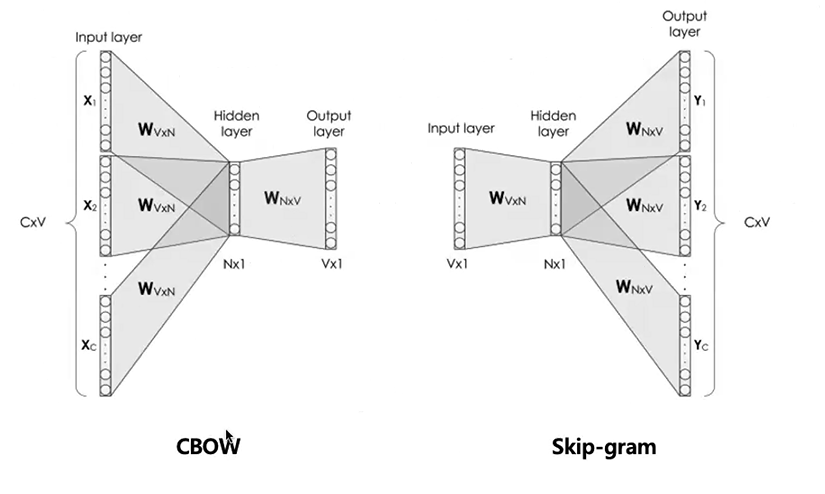

Hidden layer의 뉴런수가 Output layer의 뉴런 수보다 적다  
머신러닝의 PCA와 같이 성능 최적화하는 목적이다.

## Bert Embedding

가장 최신의 word embedding 기법



In [5]:
from transformers import BertTokenizer, BertModel
import torch

# 미리 학습된 모델과 tokenizer 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

1️⃣One sentence

In [7]:
# 입력 문장
sentence = "Word embeddings using BERT are context-aware"

# 토큰화
inputs = tokenizer(sentence, return_tensors='pt')

# 임베딩 추출
outputs = model(**inputs) # 딕셔너리 타입인 inputs를 풀어서 key=value로 전달

# Embedding vector = 각 token의 마지막 hidden state
embeddings = outputs.last_hidden_state

앞에서 봤던 문제가 해결되었는지 알기 위해 차원을 출력해보자.

In [9]:
# tensor를 numpy 배열로 변환하여 차원 확인
embeddings_array = embeddings.detach().numpy()

embeddings_array.shape, embeddings_array

((1, 13, 768),
 array([[[-0.31627268, -0.3600182 , -0.4768887 , ..., -0.39094758,
           0.01131113,  0.7314563 ],
         [-0.11911446,  0.01847039, -0.4476107 , ...,  0.05015267,
           0.5228711 ,  0.57569367],
         [-0.2600176 ,  0.3630989 , -0.48196673, ..., -0.5706141 ,
          -0.85921836,  0.37182677],
         ...,
         [-0.9348017 , -0.20805807, -0.41588423, ...,  0.03088903,
          -1.1390307 ,  0.3342928 ],
         [-0.98759836, -0.26383424, -0.80458987, ...,  0.06944039,
          -1.079943  ,  0.24913214],
         [ 0.76617646, -0.01175765, -0.6131969 , ...,  0.37541994,
          -0.7606291 , -0.08539848]]], dtype=float32))

Data Preparation

In [ ]:
# 한글과 영어 한 줄에 나오게 전처리

In [11]:
import re
with open('/content/drive/MyDrive/Colab Notebooks/ai-study/my/DL/dataset/kor.txt', encoding='utf-8') as f:
  data = f.read()

In [24]:
# 각 줄마다 CC로 시작되는 문장울 제거하고 영어 문장과 한국어 문장을 추출한다.
lines = data.strip().split('\n') # 각 행을 list로 반환
processed_data = []
for line in lines:
  # CC로 시작되는 문장 제거
  line = re.sub(r'\s*CC.*$', '', line) # 정규표현식을 사용해 제거
  processed_data.append(line)

# tab으로 구분된 한영 문장 쌍 출력
for item in processed_data[-10:]:
  print(item)

I knew that Tom was just a freshman, so I was surprised to see him hanging out with seniors.	난 톰이 그냥 신입생일 뿐이라고만 알았는데, 그러다보니 톰이랑 선배들이 서로 어울려다니는 걸 보고 놀랐어.
She asked him to help her father clean the garage, but he said that he was too busy to help.	그녀는 그녀의 아버지가 차고 청소 하는 것을 도와 주라고 그에게 얘기 했지만 그는 너무 바빠서 못 도와 준대.
If your father asks your mother a question in French, does she answer in French or in English?	너의 아버지가 어머니에게 만약 프랑스어로 질문을 하면 그녀는 프랑스어로 대답하니 아니면 영어로 대답하니?
Tom always cried when his sister took away his toys, and for that very reason she loved to do so.	톰은 누나가 자기 장난감을 빼앗아 갔을 때마다 울음을 터뜨렸고, 누나는 바로 그런 이유로 그런 짓을 곧잘 해댔다.
Science fiction has undoubtedly been the inspiration for many of the technologies that exist today.	공상 과학은 의심의 여지 없이 오늘날 존재하는 많은 기술에 영감을 주었어.
I started a new blog. I'll do my best not to be one of those people who blogs a lot right at the start and then quits blogging.	난 블로그를 시작했어. 블로그를 초반에만 반짝 많이 하다가 관두는 사람처럼은 되지 않으려고 최선을 다할 거야.
I think it's a shame that some foreign langu

In [25]:
len(processed_data)

5890

preprocessing
- tokenization
- word embedding

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [27]:
# 데이터 전처리 - 영어 한글 split
english_sentences = []
korean_sentences = []

for line in processed_data:
  en, kor = line.split('\t')

  english_sentences.append(en)
  korean_sentences.append(kor)

In [29]:
# Sentence Tokenization
def tokenize(sentences):
  tokenizer = Tokenizer(filters='', split=' ')

  tokenizer.fit_on_texts(sentences)
  tensor = tokenizer.texts_to_sequences(sentences)
  tensor = pad_sequences(tensor, padding='post')

  return tensor, tokenizer

input_tensor, input_tokenizer = tokenize(english_sentences)
target_tensor, target_tokenizer = tokenize(korean_sentences)

In [30]:
input_vocab_size = len(input_tokenizer.word_index) + 1
target_vocab_size = len(target_tokenizer.word_index) + 1

max_input_length = input_tensor.shape[1]
max_target_length = target_tensor.shape[1]

print(f'Input Vocab Size: {input_vocab_size}, Target Vocab Size: {target_vocab_size}')
print(f'Max Input Length: {max_input_length}, Max Target Length: {max_target_length}')

Input Vocab Size: 4672, Target Vocab Size: 8286
Max Input Length: 101, Max Target Length: 89


#Seq2Seq
### Construct Model

어지럽밍....

In [32]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

# Encoder
encoder_inputs = Input(shape=(max_input_length,))
encoder_embedding = Embedding(input_vocab_size, 256)(encoder_inputs)
encoder_lstm = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]


# Decoder
decoder_inputs = Input(shape=(max_target_length,))
decoder_embedding = Embedding(target_vocab_size, 256)(decoder_inputs)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(target_vocab_size, activation = 'softmax') # output layer
decoder_outputs = decoder_dense(decoder_outputs)

In [33]:
# Seq2Seq

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 101)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 89)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 101, 256)       │      1,196,032 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 89, 256)        │      2,121,216 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        525,312 │ embedding[0][0]        │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 89, 256),      │        525,312 │ embedding_1[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 89, 8286)       │      2,129,502 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,497,374 (24.79 MB)

 Trainable params: 6,497,374 (24.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 디코더 타겟 데이터 준비

